In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [30]:
train = pd.read_csv(r"..\Data\01_raw\train.csv")
train.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [31]:
train.shape

(3000888, 6)

In [32]:
output = []

for column in train.columns:

    null_values  = np.sum(pd.isna(train[column]))
    unique = train[column].nunique()
    column_data_type = train[column].dtype

    output.append([column, null_values, unique, column_data_type])

output_df = pd.DataFrame(output, columns = ['column','null values', 'unique', 'datatype'])

describe_df = train.describe().transpose() 
combine_df = pd.concat([ output_df.set_index('column'), describe_df], axis = 1, join='outer')

combine_df

,null values,unique,datatype,count,mean,std,min,25%,50%,75%,max
id,0,3000888,int64,3000888.0,1.500444e+06,866281.891642,0.0,750221.75,1500443.5,2.250665e+06,3000887.0
date,0,1684,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
store_nbr,0,54,int64,3000888.0,2.750000e+01,15.585787,1.0,14.00,27.5,4.100000e+01,54.0
family,0,33,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sales,0,379610,float64,3000888.0,3.577757e+02,1101.997721,0.0,0.00,11.0,1.958473e+02,124717.0
onpromotion,0,362,int64,3000888.0,2.602770e+00,12.218882,0.0,0.00,0.0,0.000000e+00,741.0


In [33]:
train.drop_duplicates(inplace=True)

In [34]:
train.shape

(3000888, 6)

([<matplotlib.axis.XTick at 0x2978b460dc0>,
 [Text(2013, 0, '2013'),
  Text(2014, 0, '2014'),
  Text(2015, 0, '2015'),
  Text(2016, 0, '2016'),
  Text(2017, 0, '2017')])

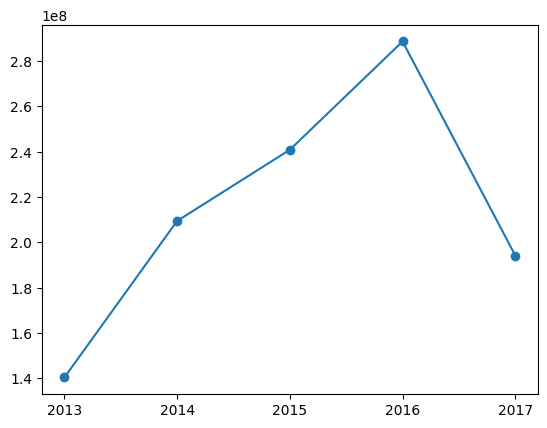

In [35]:
train['date'] = pd.to_datetime(train['date'])
train['year'] = train['date'].dt.year

yearly_data = train.groupby('year')['sales'].sum().reset_index()
plt.plot(yearly_data['year'], yearly_data['sales'], marker='o')

plt.xticks(range(2013, 2018))

Highest total sales were recorded in 2016. A drop in sales is observed in 2017 (as we don't data after august) after an upward trend from 2013 to 2016.  Given data is for 2013 to 2017.

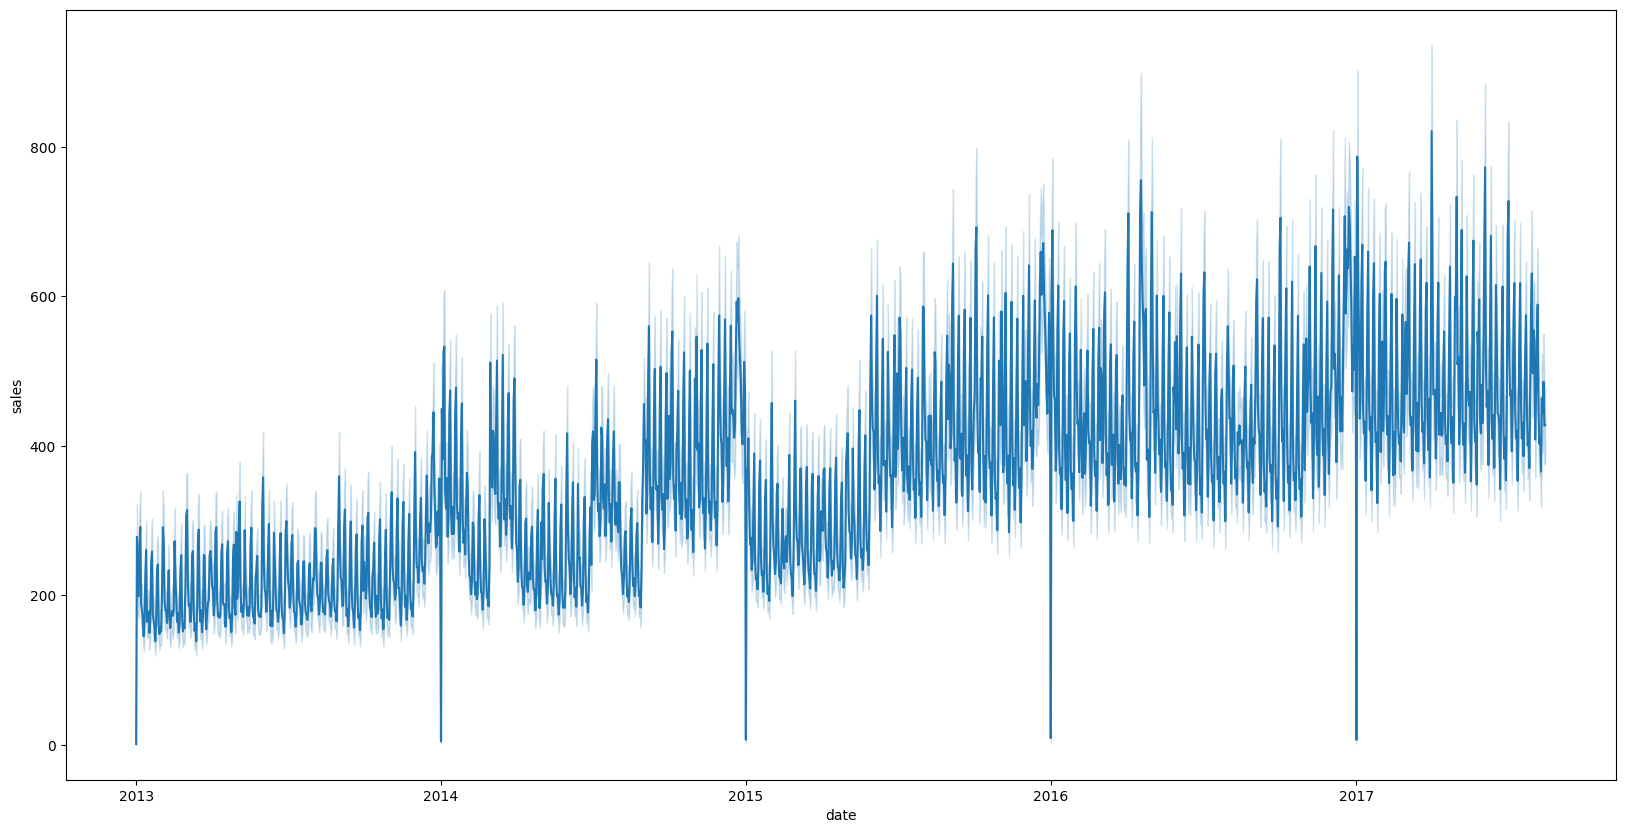

In [36]:

train['date'] = pd.to_datetime(train['date'])

plt.figure(figsize=(20, 10))
sns.lineplot(data = train, x = 'date', y = 'sales')

plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

Daily representation of the above visualization.

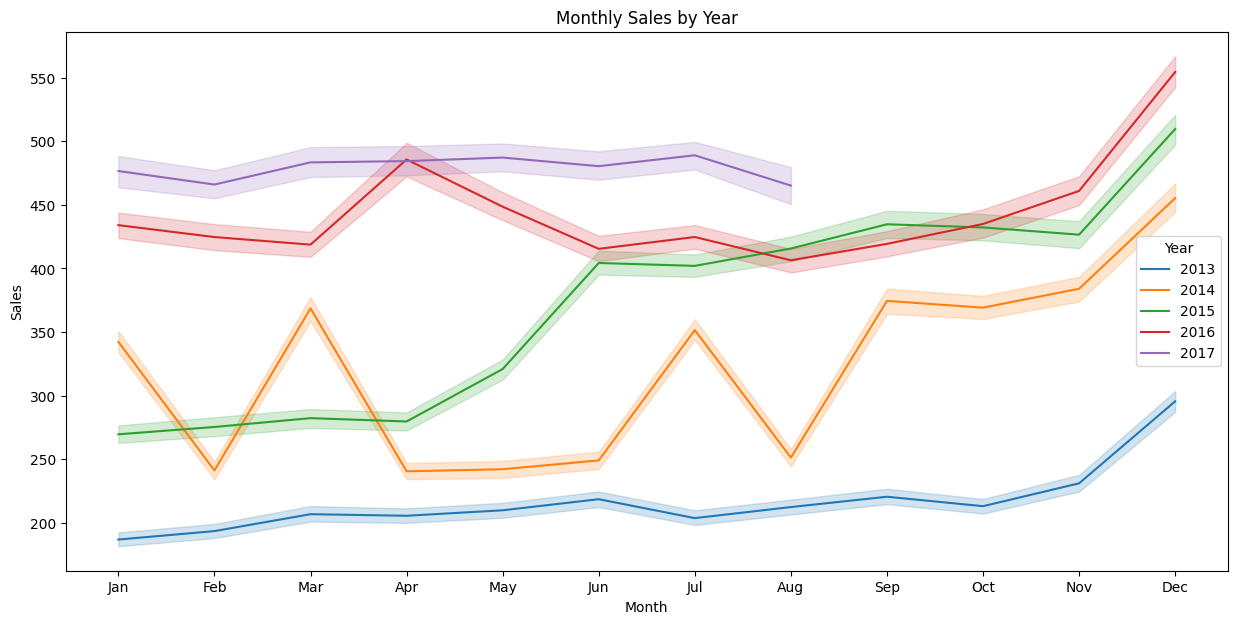

In [37]:
train['month'] = train['date'].dt.month
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.figure(figsize=(15, 7))
sns.lineplot(data=train, x='month', y='sales', hue='year', palette='tab10')
plt.title('Monthly Sales by Year')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend(title='Year')
plt.xticks(ticks=range(1, 13), labels=month_names)
plt.show()

1. 2017 shows drop in sales as we don't have data after august 2017.
2. Month of December records highest sales every year. This shows seasonality.

In [38]:
train.columns

Index(['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion', 'year',
       'month'],
      dtype='object')

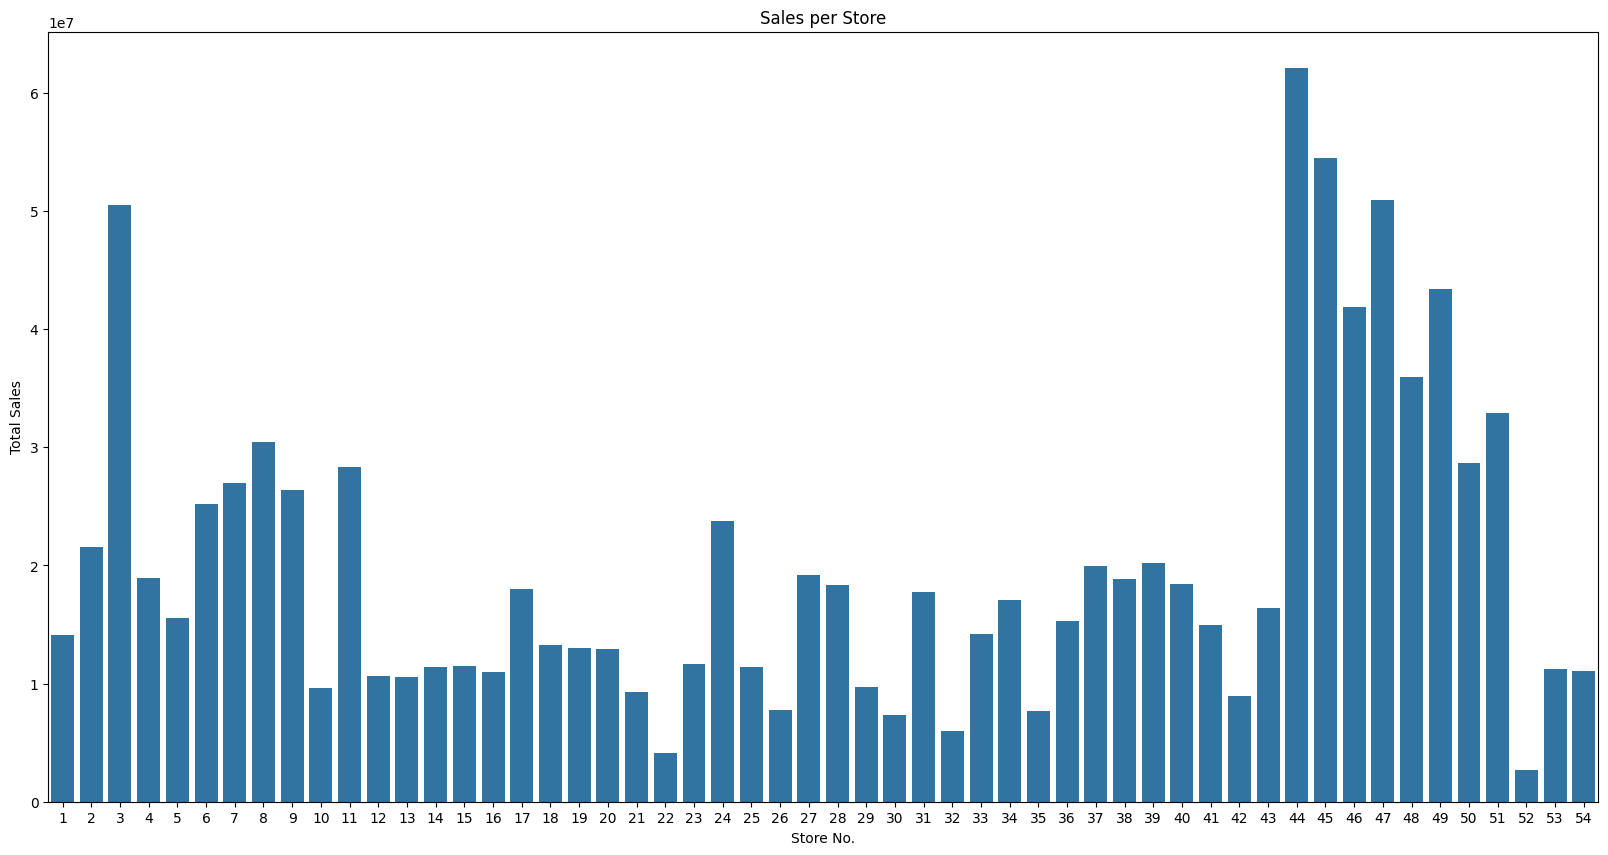

In [39]:
sales_by_store_number=train.groupby('store_nbr')['sales'].sum().to_frame()
plt.figure(figsize=(20,10))
sns.barplot(x = sales_by_store_number.index, y= "sales", data = sales_by_store_number)
plt.title('Sales per Store')
plt.ylabel('Total Sales')
plt.xlabel('Store No.')
plt.show()

1. Store number 44 has the maximum sales. 
2. Store number 52 has the lowest sales.

([<matplotlib.axis.XTick at 0x2978f411810>,
 [Text(2013, 0, '2013'),
  Text(2014, 0, '2014'),
  Text(2015, 0, '2015'),
  Text(2016, 0, '2016'),
  Text(2017, 0, '2017')])

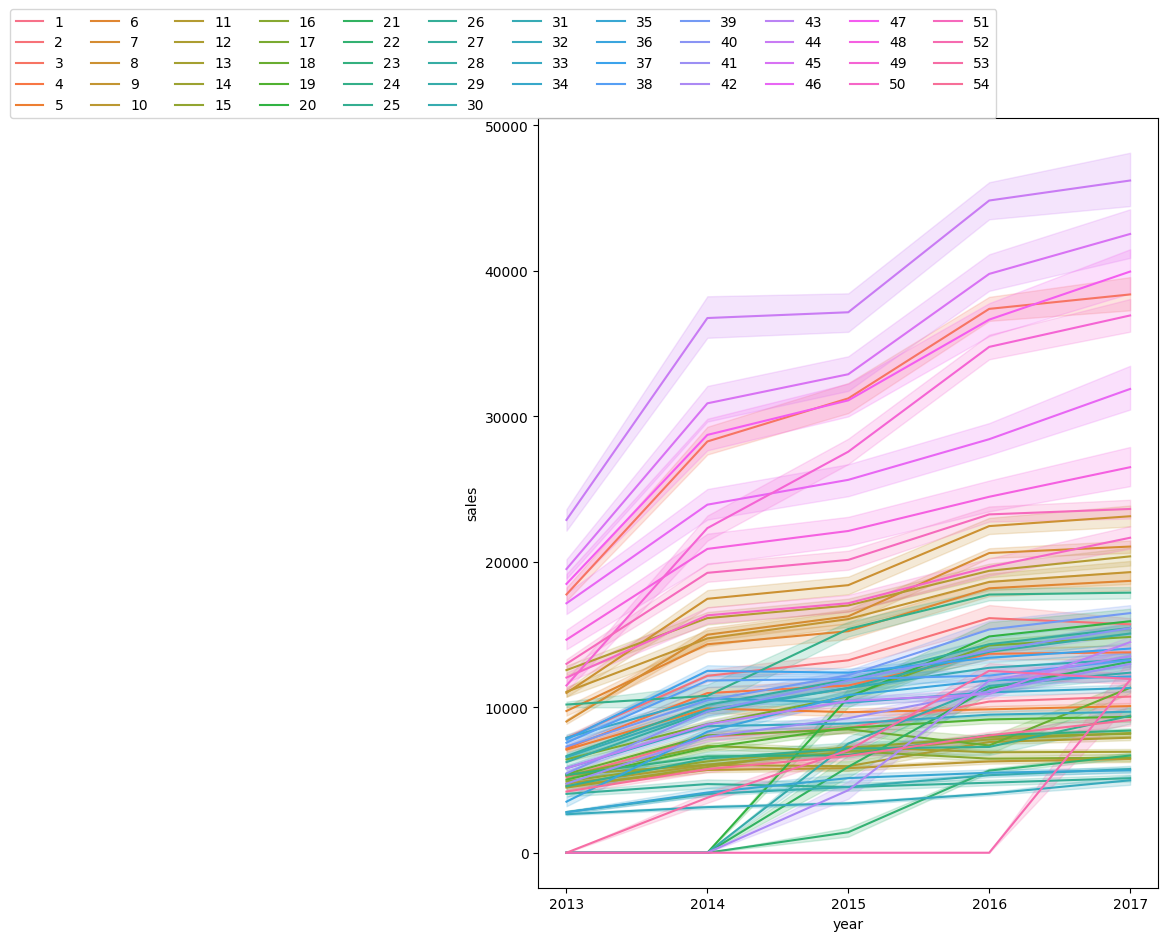

In [40]:
family = train.groupby(['date','store_nbr'])['sales'].sum().to_frame()
family.sort_values('sales')

family.reset_index(inplace=True)
family['store_nbr'] = family['store_nbr'].astype(str)

plt.figure(figsize=(8, 10))
family['date'] = pd.to_datetime(family['date'])
family['year'] = family['date'].dt.year

sns.lineplot(data = family, x = 'year', y = 'sales', hue = 'store_nbr')
plt.legend(bbox_to_anchor=(0.75, 1.15), ncol=12)
plt.xticks(range(2013, 2018))

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32],
 [Text(0, 0, 'BOOKS'),
  Text(1, 0, 'BABY CARE'),
  Text(2, 0, 'HOME APPLIANCES'),
  Text(3, 0, 'HARDWARE'),
  Text(4, 0, 'BEAUTY'),
  Text(5, 0, 'LAWN AND GARDEN'),
  Text(6, 0, 'LINGERIE'),
  Text(7, 0, 'PET SUPPLIES'),
  Text(8, 0, 'AUTOMOTIVE'),
  Text(9, 0, 'MAGAZINES'),
  Text(10, 0, 'SCHOOL AND OFFICE SUPPLIES'),
  Text(11, 0, 'LADIESWEAR'),
  Text(12, 0, 'PLAYERS AND ELECTRONICS'),
  Text(13, 0, 'CELEBRATION'),
  Text(14, 0, 'GROCERY II'),
  Text(15, 0, 'SEAFOOD'),
  Text(16, 0, 'HOME AND KITCHEN I'),
  Text(17, 0, 'HOME AND KITCHEN II'),
  Text(18, 0, 'LIQUOR,WINE,BEER'),
  Text(19, 0, 'PREPARED FOODS'),
  Text(20, 0, 'FROZEN FOODS'),
  Text(21, 0, 'EGGS'),
  Text(22, 0, 'DELI'),
  Text(23, 0, 'HOME CARE'),
  Text(24, 0, 'MEATS'),
  Text(25, 0, 'POULTRY'),
  Text(26, 0, 'PERSONAL CARE'),
  T

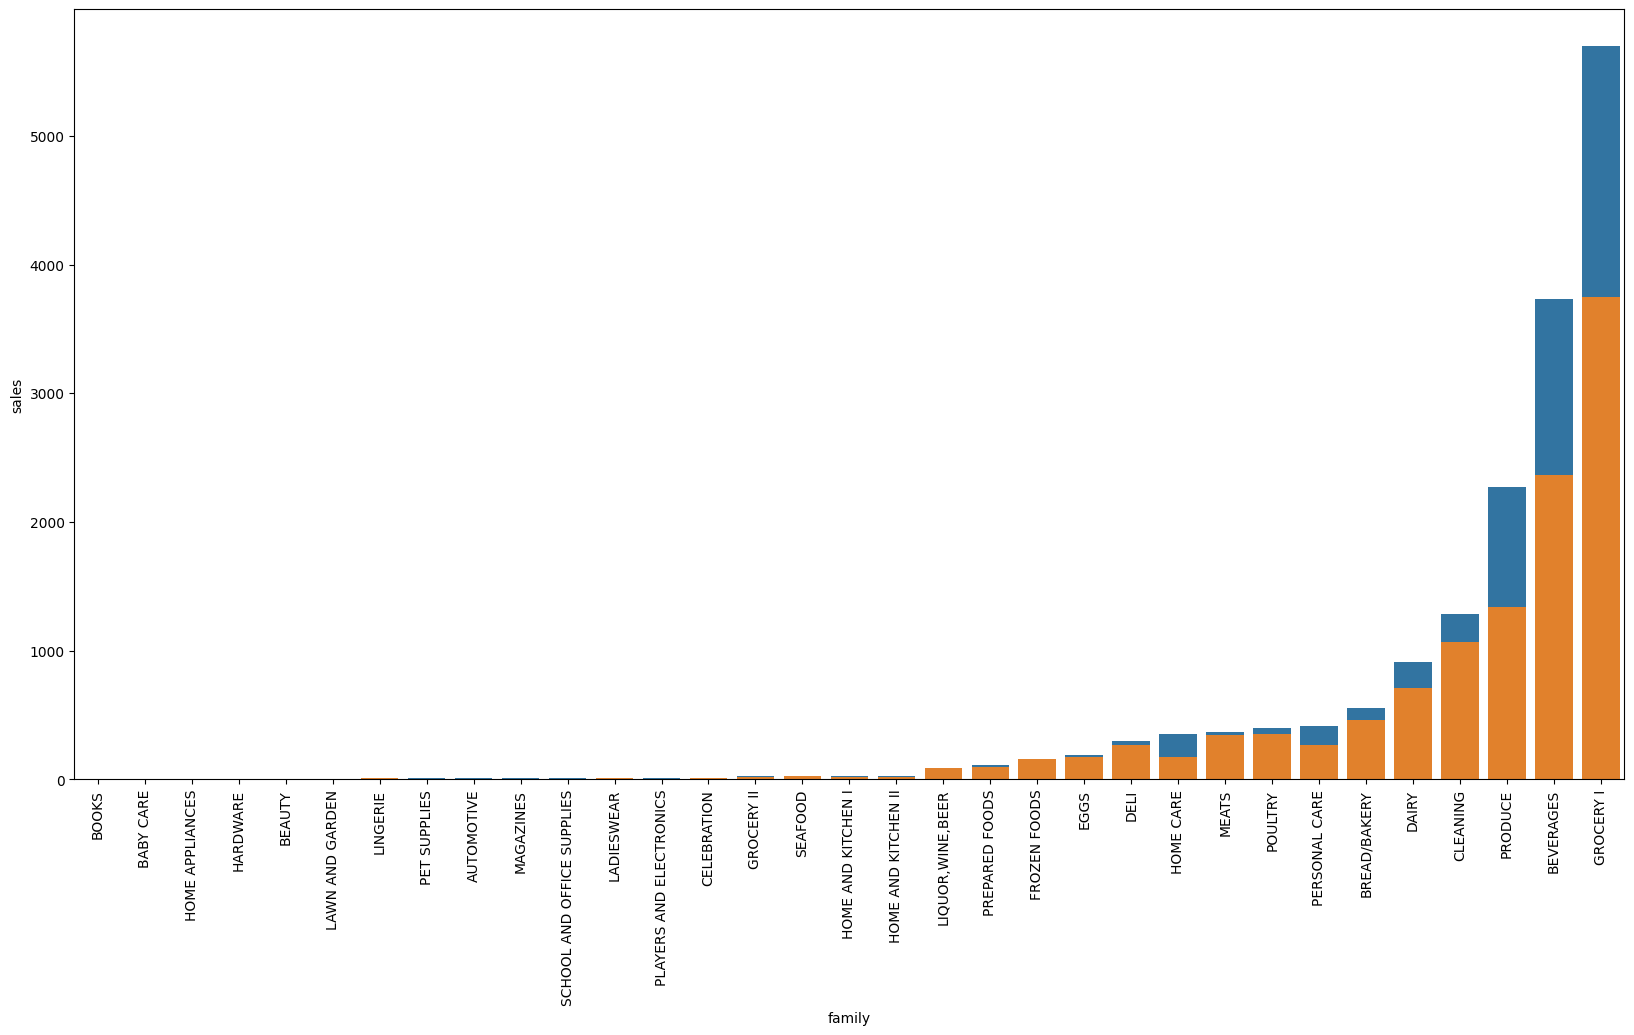

In [41]:
x = pd.date_range(start = '2016-04-16',end='2016-05-08')

y = train[train['date'].isin(x)].groupby(['family'])['sales'].mean().sort_values().to_frame()

plt.figure(figsize = (20, 10))
sns.barplot(data = y, x = 'family', y = 'sales')
plt.xticks(rotation = 90)

z = train[~train['date'].isin(x)].groupby(['family'])['sales'].mean().sort_values().to_frame()

sns.barplot(data = z, x = 'family', y = 'sales')
plt.xticks(rotation = 90)


#sns.boxplot(data = family, y = 'sales')


From the above visualization, one can make the observation that during the Earthquake event of april 16th 2016, there was more sales as a whole.

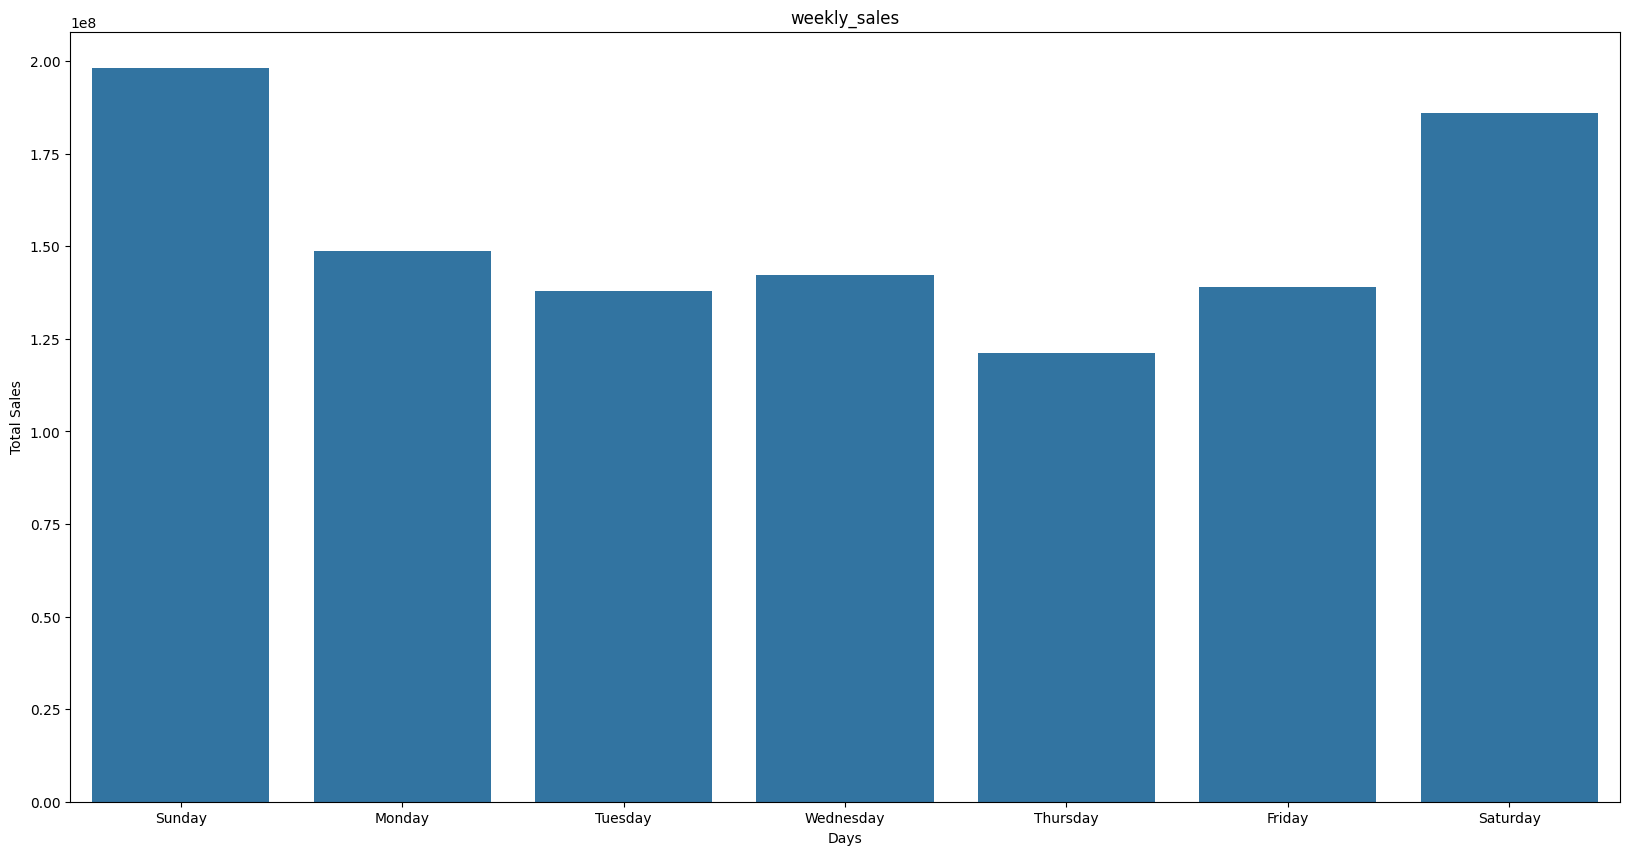

In [42]:
train['day_of_week'] = train['date'].dt.day_name()
order = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
weekly_sales=train.groupby('day_of_week')['sales'].sum().to_frame().reset_index()
plt.figure(figsize=(20,10))
sns.barplot(x = 'day_of_week', y= "sales", data = weekly_sales,order = order)
plt.title('weekly_sales')
plt.ylabel('Total Sales')
plt.xlabel('Days')
plt.show()

2389559 611329


<Axes: xlabel='under_promotion', ylabel='count'>

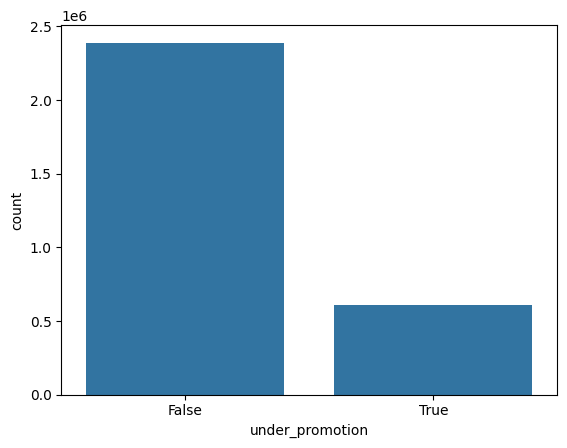

In [43]:
promo = train[train['onpromotion'] == 0]['onpromotion'].count()

promo1 = train[train['onpromotion'] != 0]['onpromotion'].count()
print(promo, promo1)

data = {"under_promotion":[True,False],"count":[promo1,promo]}
data = pd.DataFrame(data)
sns.barplot(data = data,x = "under_promotion",y = "count")

Maximum number of products were not on promotion.

<Axes: xlabel='promotions', ylabel='total_sales'>

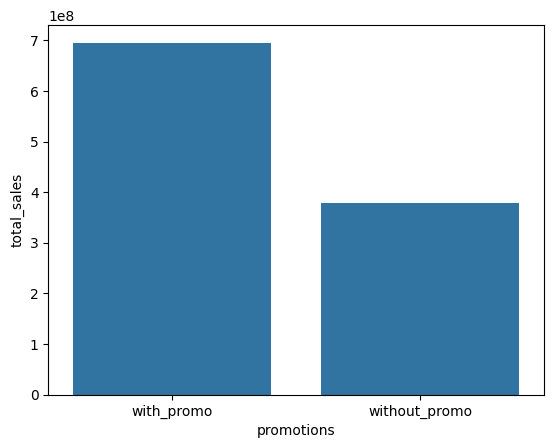

In [44]:
count_promo = train[train['onpromotion'] != 0]['sales'].sum()
count_without_promo = train[train['onpromotion'] == 0]['sales'].sum()
data_frame = {"promotions":['with_promo','without_promo'],"total_sales":[count_promo,count_without_promo]}
data_frame = pd.DataFrame(data_frame)
sns.barplot(data = data_frame,x = 'promotions',y = 'total_sales')

Products on promotion have more total sales than non promoted products.

In [45]:
product_count_promo = train[train['onpromotion'] != 0].groupby(['family'])['sales'].mean().to_frame().reset_index()
product_count_without_promo = train[train['onpromotion'] == 0].groupby(['family'])['sales'].mean().to_frame().reset_index()

product_count_promo.rename(columns={'sales':"sales_with_promo"},inplace=True)
product_count_without_promo.rename(columns={'sales':"sales_without_promo"},inplace=True)
promo = product_count_promo.merge(product_count_without_promo,how='outer',on='family')
promo

# plt.figure(figsize=(20,15))

# sns.barplot(data = promo, x = 'family', y = 'sales_with_promo', color = 'red')
# sns.barplot(data = promo, x = 'family', y = 'sales_without_promo', color = 'brown')

# plt.xticks(rotation = 90)
# plt.show()

,family,sales_with_promo,sales_without_promo
0,AUTOMOTIVE,13.241978,5.853087
1,BABY CARE,1.660377,0.109624
2,BEAUTY,8.291266,3.078452
3,BEVERAGES,3215.498308,1292.272591
4,BOOKS,NaN,0.070797
5,BREAD/BAKERY,575.485296,379.513249
6,CELEBRATION,19.969168,7.945922
7,CLEANING,1240.210741,868.378326
8,DAIRY,933.341720,479.811128
9,DELI,321.665801,221.763382


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32],
 [Text(0, 0, 'AUTOMOTIVE'),
  Text(1, 0, 'BABY CARE'),
  Text(2, 0, 'BEAUTY'),
  Text(3, 0, 'BEVERAGES'),
  Text(4, 0, 'BOOKS'),
  Text(5, 0, 'BREAD/BAKERY'),
  Text(6, 0, 'CELEBRATION'),
  Text(7, 0, 'CLEANING'),
  Text(8, 0, 'DAIRY'),
  Text(9, 0, 'DELI'),
  Text(10, 0, 'EGGS'),
  Text(11, 0, 'FROZEN FOODS'),
  Text(12, 0, 'GROCERY I'),
  Text(13, 0, 'GROCERY II'),
  Text(14, 0, 'HARDWARE'),
  Text(15, 0, 'HOME AND KITCHEN I'),
  Text(16, 0, 'HOME AND KITCHEN II'),
  Text(17, 0, 'HOME APPLIANCES'),
  Text(18, 0, 'HOME CARE'),
  Text(19, 0, 'LADIESWEAR'),
  Text(20, 0, 'LAWN AND GARDEN'),
  Text(21, 0, 'LINGERIE'),
  Text(22, 0, 'LIQUOR,WINE,BEER'),
  Text(23, 0, 'MAGAZINES'),
  Text(24, 0, 'MEATS'),
  Text(25, 0, 'PERSONAL CARE'),
  Text(26, 0, 'PET SUPPLIES'),
  Text(27, 0, 'PLAYERS AND ELECTRONIC

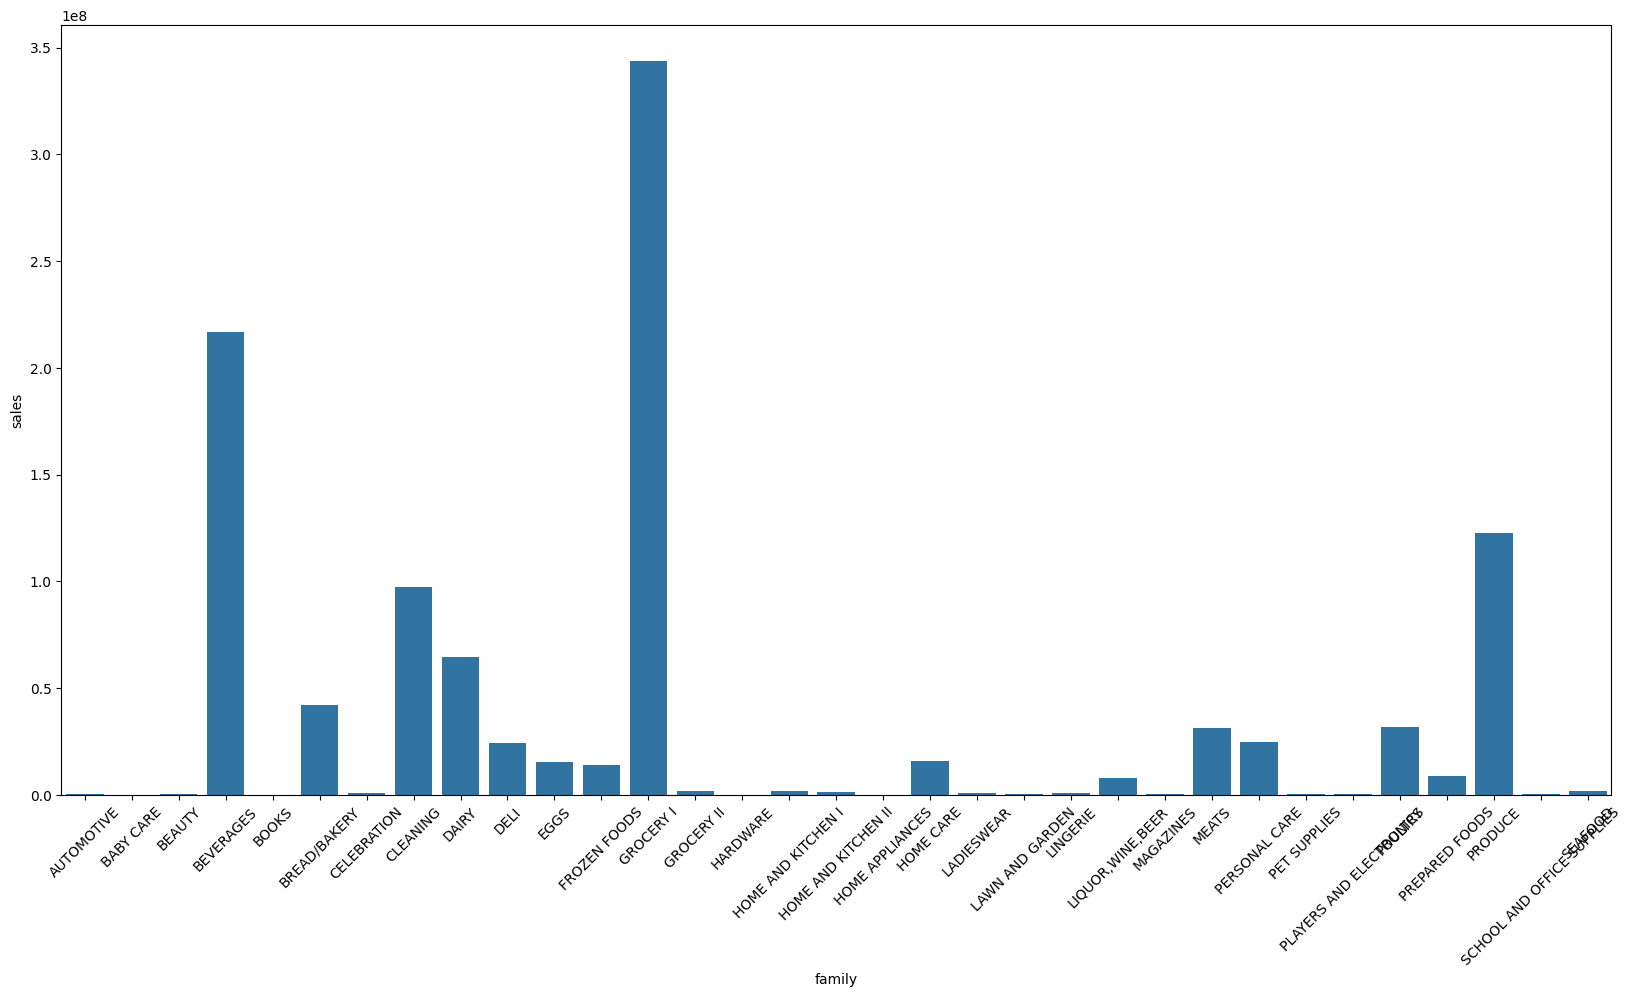

In [46]:
number_of_product = train.groupby('family')['sales'].sum().reset_index()
plt.figure(figsize=(20,10))
sns.barplot(x = 'family', y= "sales", data = number_of_product)
plt.xticks(rotation = 45)

Grocery 1 has highest number of sales.

In [47]:
train.columns

Index(['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion', 'year',
       'month', 'day_of_week'],
      dtype='object')

In [51]:
#train['day'] = train['date'].dt.day
train

,id,date,store_nbr,family,sales,onpromotion,year,month,day_of_week,day
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,2013,1,Tuesday,1
1,1,2013-01-01,1,BABY CARE,0.000,0,2013,1,Tuesday,1
2,2,2013-01-01,1,BEAUTY,0.000,0,2013,1,Tuesday,1
3,3,2013-01-01,1,BEVERAGES,0.000,0,2013,1,Tuesday,1
4,4,2013-01-01,1,BOOKS,0.000,0,2013,1,Tuesday,1
...,...,...,...,...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0,2017,8,Tuesday,15
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,2017,8,Tuesday,15
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148,2017,8,Tuesday,15
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,2017,8,Tuesday,15


C:\Users\User131f\AppData\Local\Temp\ipykernel_17032\1816172518.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  total_sales = train.groupby(['year', 'month']).apply(


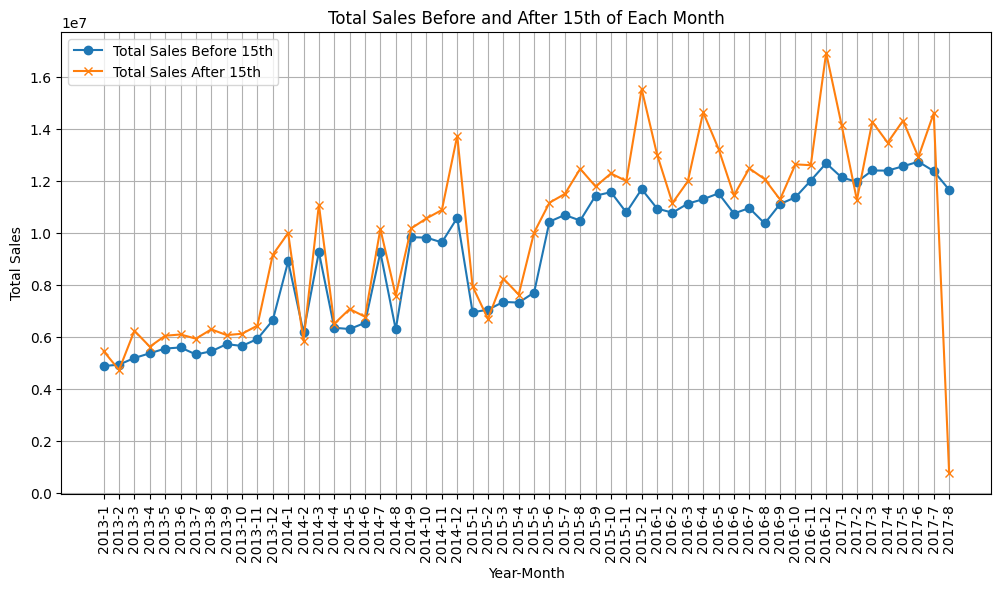

In [52]:
total_sales = train.groupby(['year', 'month']).apply(
    lambda df: pd.Series({
        'total_sales_before_15th': df[df['day'] < 15]['sales'].sum(),
        'total_sales_after_15th': df[df['day'] >= 15]['sales'].sum()
    })
).reset_index()


total_sales['month'] = total_sales['month'].astype(str)

total_sales['year_month'] = total_sales['year'].astype(str) + '-' + total_sales['month']

plt.figure(figsize=(12, 6))

plt.plot(total_sales['year_month'], total_sales['total_sales_before_15th'], marker='o', label='Total Sales Before 15th')
plt.plot(total_sales['year_month'], total_sales['total_sales_after_15th'], marker='x', label='Total Sales After 15th')

plt.xlabel('Year-Month')
plt.ylabel('Total Sales')
plt.title('Total Sales Before and After 15th of Each Month')
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.show()

Sales increases after 15th and last date of the month as wages are paid in public sector.  

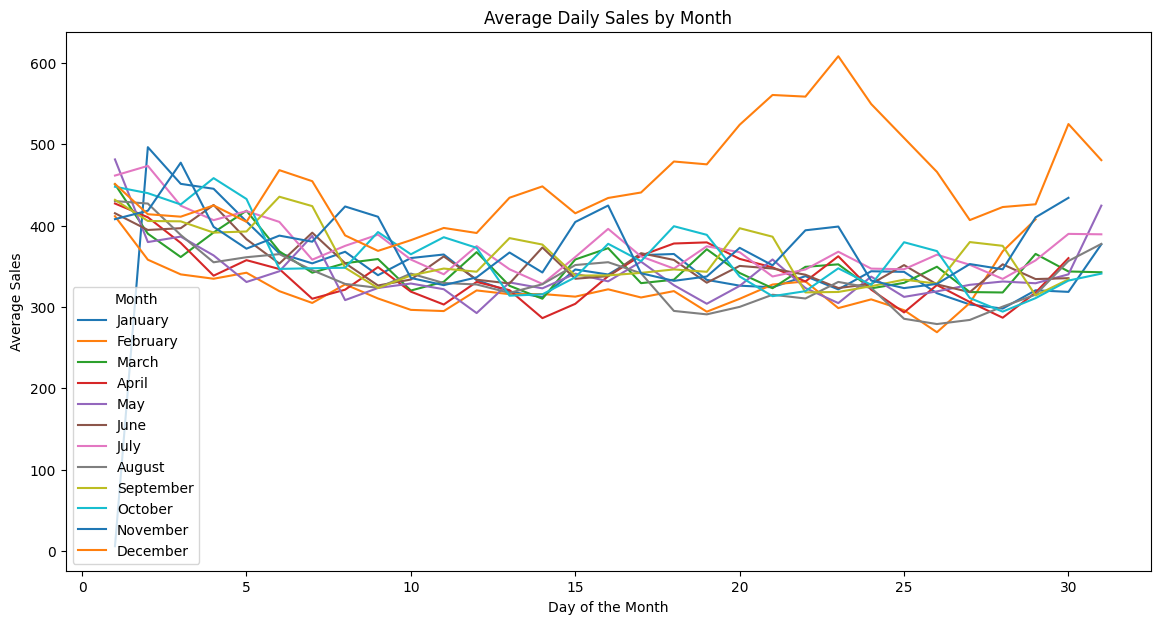

In [68]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(14, 7))
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Loop through each month and plot the data
for month in range(1, 13):
    month_data = train[train['month'] == month]
    month_data = month_data.groupby('day')['sales'].mean().to_frame().reset_index()
    sns.lineplot(data=month_data, x='day', y='sales', label=month_names[month-1])

plt.xlabel('Day of the Month')
plt.ylabel('Average Sales')
plt.title('Average Daily Sales by Month')
plt.legend(title='Month')
plt.show()
